In [1]:
import numpy as np, analysis as ana, plottools as pl, prjlib, binning as bins
from matplotlib.pyplot import *

In [2]:
mb = bins.multipole_binning(10,spc='p2',lmin=20,lmax=2048)
p0 = prjlib.params_init(stype='lcmb',PSA='s14&15_deep56',doreal='True',dearot='True',rlmin='200',ver='v1')
p1 = prjlib.params_init(stype='lcmb',PSA='s14&15_deep56',doreal='True',dearot='False',rlmin='200',ver='v1')
scb = prjlib.binned_cl_rlz(p0.quad.f['EB'].cl,1,200,mb)
ocb0 = prjlib.binned_cl(p0.quad.f['EB'].cl[0],mb)
ocb1 = prjlib.binned_cl(p1.quad.f['EB'].cl[0],mb)
pa, __ = prjlib.filename_init(rlmin='200',stype='absrot')
acb = prjlib.binned_cl_rlz(pa.quad.f['EB'].cl,1,100,mb)
dcb = np.mean(acb-scb[:100,:],axis=0)
#ocb = prjlib.binned_cl(p.quad.f['EB'].cl[0].replace('dearot','dearot_old'),mb0,mb1)

In [3]:
# x2 PTE
st = ana.PTEs(ocb0,scb[:100,:],comment='100 rlz')
st = ana.PTEs(ocb0,scb,comment='200 rlz')
st = ana.PTEs(ocb1,scb,comment='no derotation')
st = ana.PTEs(ocb0,scb,diag=True,comment='diagonal cov')
st = ana.PTEs(ocb0-dcb*(.06/.08)**2,scb[100:,:],comment='absrot error')

chi^2: 2.8 , chi^2 (sim): 11.2 , PTE:0.99 (100 rlz)
chi^2: 2.8 , chi^2 (sim): 10.5 , PTE:0.99 (200 rlz)
chi^2: 2.7 , chi^2 (sim): 10.5 , PTE:0.99 (no derotation)
chi^2: 1.5 , chi^2 (sim): 10.5 , PTE:1.0 (diagonal cov)
chi^2: 2.9 , chi^2 (sim): 11.2 , PTE:0.99 (absrot error)


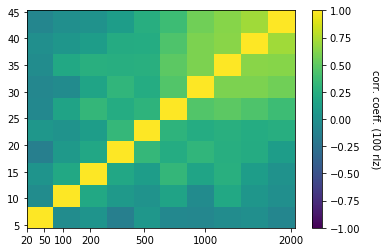

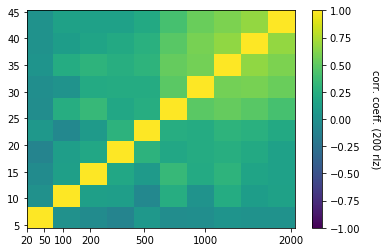

In [4]:
# correlation coefficients
pl.plot_corr(scb[:100,:],mb.bp,spc='p2',clab='corr. coeff. (100 rlz)')
pl.plot_corr(scb,mb.bp,spc='p2',clab='corr. coeff. (200 rlz)')

In [5]:
# x2pte dependencies on Lmin
for lmin in [10,30]:
    mb  = bins.multipole_binning(10,spc='p2',lmin=lmin,lmax=2048)
    scb = prjlib.binned_cl_rlz(p0.quad.f['EB'].cl,1,200,mb)
    ocb = prjlib.binned_cl(p0.quad.f['EB'].cl[0],mb)
    st = ana.PTEs(ocb,scb,decimals=5,comment='Lmin='+str(lmin))

chi^2: 6.1 , chi^2 (sim): 10.5 , PTE:0.845 (Lmin=10)
chi^2: 4.2 , chi^2 (sim): 10.5 , PTE:0.935 (Lmin=30)


In [6]:
# x2pte dependencies on number of bins
for bn in [15,20]:
    mb  = bins.multipole_binning(bn,spc='p2',lmin=20,lmax=2048)
    scb = prjlib.binned_cl_rlz(p0.quad.f['EB'].cl,1,200,mb)
    ocb = prjlib.binned_cl(p0.quad.f['EB'].cl[0],mb)
    st = ana.PTEs(ocb,scb,decimals=5,comment='bin num = '+str(bn))

chi^2: 11.3 , chi^2 (sim): 16.3 , PTE:0.765 (bin num = 15)
chi^2: 14.3 , chi^2 (sim): 22.3 , PTE:0.88 (bin num = 20)
